In [371]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for visualisation
import matplotlib.pyplot as plt

In [372]:
#Importing the dataset
data = pd.read_csv("titanic.csv", index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
# cleaning data set
data.drop('Cabin',axis=1, inplace=True)
data = data.dropna()

In [374]:
# seperating dependent and independent variables
X = data.iloc[:,[1,4,8]].values
y = data.iloc[:,[0]].values

In [328]:
# getting training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.20, shuffle=True)

In [329]:
# getting training and development set
X_train, X_dev, y_train, y_dev = train_test_split(X_train, 
                y_train, test_size=0.20, shuffle=True)

In [330]:
# training a decision tree model
unpruned = DecisionTreeClassifier(max_depth=None)
unpruned.fit(X_train, y_train)

DecisionTreeClassifier()

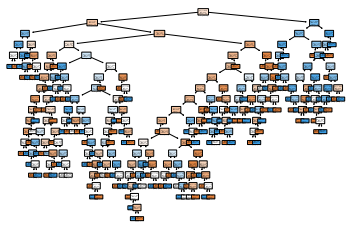

In [331]:
# getting tree decision diagram drawn
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(unpruned, out_file='unpruned_tree.dot', feature_names = data['Name'],
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'unpruned_tree.dot', '-o', 'unpruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(unpruned, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('unpruned_tree.png')

In [332]:
score=unpruned.score(X_dev, y_dev)
depth=unpruned.tree_.max_depth
scores=[]
trainscores=[]
print("Performance without pruning:", score)
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.6578947368421053
At depth: 19


In [333]:
# training a decision tree model with max depth 2
depth2 = DecisionTreeClassifier(max_depth=2)
depth2.fit(X_train, y_train)
nscore=depth2.score(X_dev, y_dev)
trainscores.append(depth2.score(X_train, y_train))
ndepth = depth2.tree_.max_depth
if nscore > score:
    score= nscore
    depth= ndepth
scores.append(nscore)
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6842105263157895
At depth: 2


[Text(0.5, 0.8333333333333334, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.25, 0.5, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.44\nsamples = 343\nvalue = [233, 110]'),
 Text(0.75, 0.5, 'X[2] <= 152.51\ngini = 0.35\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.38\nsamples = 71\nvalue = [18, 53]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.13\nsamples = 14\nvalue = [1, 13]')]

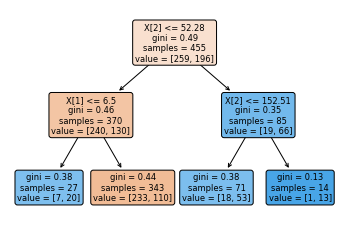

In [334]:
# display tree
fig = plt.figure()
tree.plot_tree(depth2, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [335]:
# training a decision tree model with max depth 3
depth3 = DecisionTreeClassifier(max_depth=3)
depth3.fit(X_train, y_train)
nscore=depth3.score(X_dev, y_dev)
trainscores.append(depth3.score(X_train, y_train))
ndepth = depth3.tree_.max_depth
if nscore > score:
    score= nscore
    depth= ndepth
scores.append(nscore)
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6666666666666666
At depth: 3


[Text(0.5, 0.875, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.25, 0.625, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.125, 0.375, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.0625, 0.125, 'gini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.1875, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.375, 0.375, 'X[0] <= 2.5\ngini = 0.44\nsamples = 343\nvalue = [233, 110]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 133\nvalue = [73, 60]'),
 Text(0.4375, 0.125, 'gini = 0.36\nsamples = 210\nvalue = [160, 50]'),
 Text(0.75, 0.625, 'X[2] <= 152.51\ngini = 0.35\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.375, 'X[2] <= 60.39\ngini = 0.38\nsamples = 71\nvalue = [18, 53]'),
 Text(0.5625, 0.125, 'gini = 0.22\nsamples = 16\nvalue = [2, 14]'),
 Text(0.6875, 0.125, 'gini = 0.41\nsamples = 55\nvalue = [16, 39]'),
 Text(0.875, 0.375, 'X[1] <= 20.0\ngini = 0.13\nsamples = 14\nvalue = [1, 13]'),
 Text(0.8

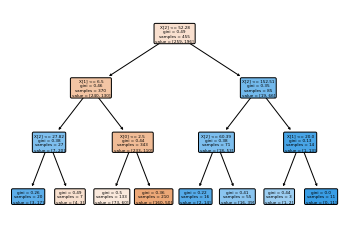

In [336]:
# display tree
fig = plt.figure()
tree.plot_tree(depth3, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [337]:
# training a decision tree model with max depth 4
depth4 = DecisionTreeClassifier(max_depth=4)
depth4.fit(X_train, y_train)
nscore=depth4.score(X_dev, y_dev)
trainscores.append(depth4.score(X_train, y_train))
ndepth = depth4.tree_.max_depth
scores.append(nscore)
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6754385964912281
At depth: 4


[Text(0.5431034482758621, 0.9, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.27586206896551724, 0.7, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.13793103448275862, 0.5, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.06896551724137931, 0.3, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.20689655172413793, 0.3, 'X[0] <= 2.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.41379310344827586, 0.5, 'X[0] <= 2.5\ngini = 0.44\nsamples = 343\nvalue = [233, 110]'),
 Text(0.3448275862068966, 0.3, 'X[2] <= 13.65\ngini = 0.5\nsamples = 133\nvalue = [73, 60]'),
 Text(0.3103448275862069, 0.1, 'gi

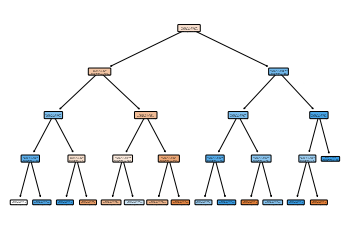

In [338]:
# display tree
fig = plt.figure()
tree.plot_tree(depth4, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [339]:
# training a decision tree model with max depth 5
depth5 = DecisionTreeClassifier(max_depth=5)
depth5.fit(X_train, y_train)
nscore=depth5.score(X_dev, y_dev)
ndepth = depth5.tree_.max_depth
trainscores.append(depth5.score(X_train, y_train))
scores.append(nscore)
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.7105263157894737
At depth: 5


[Text(0.5922619047619048, 0.9166666666666666, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.31547619047619047, 0.75, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.15476190476190477, 0.5833333333333334, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.09523809523809523, 0.4166666666666667, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.047619047619047616, 0.25, 'X[2] <= 9.49\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.023809523809523808, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.25, 'X[2] <= 20.83\ngini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.11904761904761904, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.38\nsamples = 8\nvalue = [2, 6]'),
 Text(0.21428571

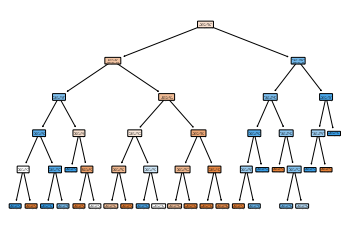

In [340]:
# display tree
fig = plt.figure()
tree.plot_tree(depth5, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [341]:
# training a decision tree model with max depth 6
depth6 = DecisionTreeClassifier(max_depth=6)
depth6.fit(X_train, y_train)
nscore=depth6.score(X_dev, y_dev)
ndepth = depth6.tree_.max_depth
trainscores.append(depth6.score(X_train, y_train))
scores.append(nscore)
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6666666666666666
At depth: 6


[Text(0.5982142857142857, 0.9285714285714286, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.3137755102040816, 0.7857142857142857, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.1326530612244898, 0.6428571428571429, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.08163265306122448, 0.5, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.04081632653061224, 0.35714285714285715, 'X[2] <= 9.49\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02040816326530612, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.061224489795918366, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12244897959183673, 0.35714285714285715, 'X[2] <= 20.83\ngini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.10204081632653061, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.14285714285714285, 0.21428571428571427, 'X[2] <= 21.55\ngini = 0.38\nsample

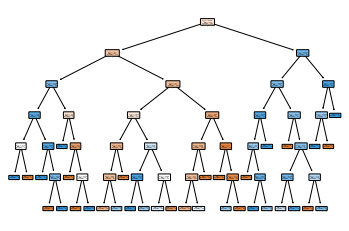

In [342]:
# display tree
fig = plt.figure()
tree.plot_tree(depth6, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [343]:
# training a decision tree model with max depth 7
depth7 = DecisionTreeClassifier(max_depth=7)
depth7.fit(X_train, y_train)
nscore=depth7.score(X_dev, y_dev)
ndepth = depth7.tree_.max_depth
trainscores.append(depth7.score(X_train, y_train))
scores.append(nscore)
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.7017543859649122
At depth: 7


[Text(0.5915697674418605, 0.9375, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.2858527131782946, 0.8125, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.10077519379844961, 0.6875, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.06201550387596899, 0.5625, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.031007751937984496, 0.4375, 'X[1] <= 1.21\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.015503875968992248, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.046511627906976744, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09302325581395349, 0.4375, 'X[2] <= 20.83\ngini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.07751937984496124, 0.3125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.10852713178294573, 0.3125, 'X[2] <= 21.55\ngini = 0.38\nsamples = 8\nvalue = [2, 6]'),
 Text(0.09302325581395349, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Tex

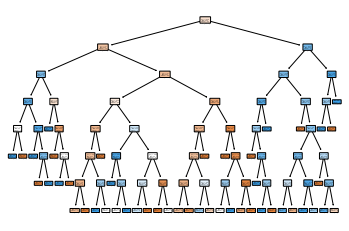

In [344]:
# display tree
fig = plt.figure()
tree.plot_tree(depth7, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [345]:
# training a decision tree model with max depth 8
depth8 = DecisionTreeClassifier(max_depth=8)
depth8.fit(X_train, y_train)
nscore=depth8.score(X_dev, y_dev)
ndepth = depth8.tree_.max_depth
trainscores.append(depth8.score(X_train, y_train))
scores.append(nscore)
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6491228070175439
At depth: 8


[Text(0.5625, 0.9444444444444444, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.2569444444444444, 0.8333333333333334, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.08024691358024691, 0.7222222222222222, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.04938271604938271, 0.6111111111111112, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.024691358024691357, 0.5, 'X[1] <= 1.21\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.012345679012345678, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.037037037037037035, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07407407407407407, 0.5, 'X[2] <= 20.83\ngini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.06172839506172839, 0.3888888888888889, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.08641975308641975, 0.3888888888888889, 'X[2] <= 21.55\ngini = 0.38\nsamples = 8\nvalue = [2, 6]'),
 Text

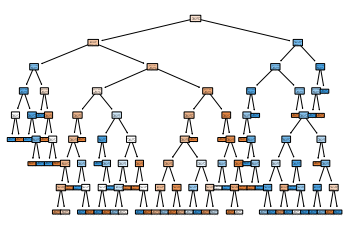

In [346]:
# display tree
fig = plt.figure()
tree.plot_tree(depth8, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

In [347]:
# training a decision tree model with max depth 9
depth9 = DecisionTreeClassifier(max_depth=9)
depth9.fit(X_train, y_train)
nscore=depth9.score(X_dev, y_dev)
ndepth = depth9.tree_.max_depth
scores.append(nscore)
trainscores.append(depth9.score(X_train, y_train))
if nscore > score:
    score= nscore
    depth= ndepth
print("Performance without pruning:", nscore)
print("At depth:", ndepth)

Performance without pruning: 0.6842105263157895
At depth: 9


[Text(0.5603932584269663, 0.95, 'X[2] <= 52.28\ngini = 0.49\nsamples = 455\nvalue = [259, 196]'),
 Text(0.24859550561797752, 0.85, 'X[1] <= 6.5\ngini = 0.46\nsamples = 370\nvalue = [240, 130]'),
 Text(0.07303370786516854, 0.75, 'X[2] <= 27.82\ngini = 0.38\nsamples = 27\nvalue = [7, 20]'),
 Text(0.0449438202247191, 0.65, 'X[2] <= 10.8\ngini = 0.26\nsamples = 20\nvalue = [3, 17]'),
 Text(0.02247191011235955, 0.55, 'X[2] <= 9.49\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.011235955056179775, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.033707865168539325, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06741573033707865, 0.55, 'X[2] <= 20.83\ngini = 0.2\nsamples = 18\nvalue = [2, 16]'),
 Text(0.056179775280898875, 0.45, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.07865168539325842, 0.45, 'X[2] <= 21.55\ngini = 0.38\nsamples = 8\nvalue = [2, 6]'),
 Text(0.06741573033707865, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0898876404494382, 

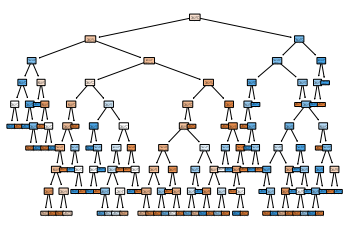

In [348]:
# display tree
fig = plt.figure()
tree.plot_tree(depth9, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

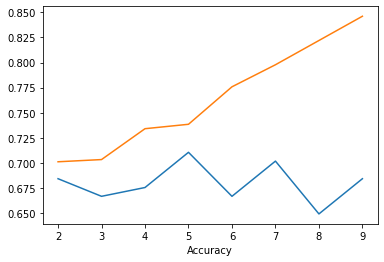

In [349]:
# drawing diagram of accuracy vs depth


depths = [2,3,4,5,6,7,8,9]
fig, ax = plt.subplots()
ax.plot(depths, scores)
ax.plot(depths, trainscores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(depths)
plt.show()

The higher the max depth the more overfitting there is and less accuracy because of it therefore ill use max depth 4

In [350]:
# fitting the chosen tree

pruned = DecisionTreeClassifier(max_depth=4)
pruned.fit(X, y)

nscore=pruned.score(X_test, y_test)
print("Performance:", nscore)

Performance: 0.7622377622377622


In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) # 70% training and 30% test

In [376]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Accuracy base: 0.6713286713286714
Accuracy bagged: 0.6783216783216783


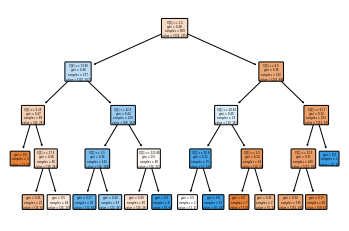

In [377]:
# Create base model
base = DecisionTreeClassifier(max_depth=4)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=12)

base.fit(X_train,y_train.flatten())
ensemble.fit(X_train,y_train.flatten())

# display tree
fig = plt.figure()
tree.plot_tree(base, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

print("Accuracy base:",base.score(X_test, y_test.flatten()))
print("Accuracy bagged:",ensemble.score(X_test, y_test.flatten()))

Accuracy base: 0.6713286713286714
Accuracy boost: 0.6433566433566433


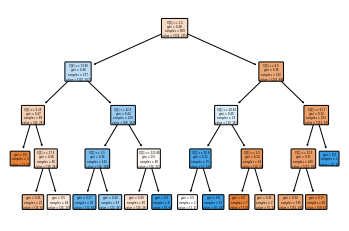

In [378]:
# Create base model
base = DecisionTreeClassifier(max_depth=4)
ensemble = AdaBoostClassifier(base_estimator=base, n_estimators=100, random_state=12)

base.fit(X_train,y_train.flatten())
ensemble.fit(X_train,y_train.flatten())

# display tree
fig = plt.figure()
tree.plot_tree(base, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

print("Accuracy base:",base.score(X_test, y_test.flatten()))
print("Accuracy boost:",ensemble.score(X_test, y_test.flatten()))

C:\Users\xavim\AppData\Local\Temp/ipykernel_24924/1813865441.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Accuracy forest: 0.6433566433566433


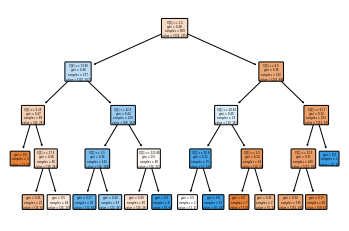

In [379]:
forest = RandomForestClassifier(n_estimators=100, random_state=12)
forest.fit(X_train, y_train)

# display tree
fig = plt.figure()
tree.plot_tree(base, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree

print("Accuracy forest:",forest.score(X_test, y_test.flatten()))

In [380]:
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.468833
1    0.415351
0    0.115816
dtype: float64

Fare seems to have the greatest effect followed by age, pclass seems to have little impact so i will drop it now. I will use bagged in my model as it has had the highest score.

In [381]:
# select important features
X = X[:, 1:]

# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [382]:
# loop through n_estimators and max depths and find the highest score and return depth score and nestimator which got it
bscore = 0
for e in range(1,101):
    for d in range(1,10):

        base = DecisionTreeClassifier(max_depth=d)
        ensemble = BaggingClassifier(base_estimator=base, n_estimators=e, random_state=7)

        #base.fit(X_train,y_train.flatten())
        ensemble.fit(X_train,y_train.flatten())
        
        nscore=ensemble.score(X_test, y_test.flatten())
        if nscore > bscore:
            bscore = nscore
            bdepth = d
            bestimator = e


print(f'Best score for bagged was {bscore} and it was done with a max depth of {bdepth} and an estimator of {bestimator}')

Best score for bagged was 0.7078651685393258 and it was done with a max depth of 4 and an estimator of 22


In [383]:
# loop through n_estimators and max depths and find the highest score and return depth score and nestimator which got it
bscore = 0
for e in range(1,101):
    for d in range(1,10):

        base = DecisionTreeClassifier(max_depth=d)
        ensemble = AdaBoostClassifier(base_estimator=base, n_estimators=e, random_state=7)

        #base.fit(X_train,y_train.flatten())
        ensemble.fit(X_train,y_train.flatten())
        
        nscore=ensemble.score(X_test, y_test.flatten())
        if nscore > bscore:
            bscore = nscore
            bdepth = d
            bestimator = e


print(f'Best score for boost was {bscore} and it was done with a max depth of {bdepth} and an estimator of {bestimator}')

Best score for boost was 0.7247191011235955 and it was done with a max depth of 3 and an estimator of 2


In [385]:
# loop through n_estimators and max depths and find the highest score and return depth score and nestimator which got it
bscore = 0
for e in range(1,101):

    forest = RandomForestClassifier(n_estimators=e, random_state=7)
    forest.fit(X_train, y_train.flatten())
        
    nscore=forest.score(X_test, y_test.flatten())
    if nscore > bscore:
        bscore = nscore
        bestimator = e


print(f'Best score for forest was {bscore} and it was done with an estimator of {bestimator}')

Best score for forest was 0.6966292134831461 and it was done with an estimator of 4
